In [13]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

MS_PER_S = 1000
US_PER_S = 1000 * MS_PER_S
NS_PER_S = 1000 * US_PER_S

In [17]:
#df_iterations = pd.read_csv("../results/results.renaissance.full.20220429-192302.csv")
df_iterations = pd.read_csv("../results.renaissance.test.csv")
df_iterations[(df_iterations.type == "sequential") & (df_iterations.benchmark == "chi-square")]

df_iterations["iteration_start"] = pd.to_datetime(df_iterations["iteration_start_ns"], unit="ns")
df_iterations["iteration_end"] = pd.to_datetime(df_iterations["iteration_end_ns"], unit="ns")
df_iterations["iteration_time"] = df_iterations["iteration_end"] - df_iterations["iteration_start"]
df_iterations.head()

,suite,benchmark,runid,iteration,type,pair,order,epoch_start_ms,iteration_time_ns,date,hostname,lscpu,meminfo,uname,iteration_start_ns,iteration_end_ns,iteration_start,iteration_end,iteration_time
0,renaissance,chi-square,1,0,sequential,B,BA,1652636049905,5589904584,Sun May 15 07:32:04 PM CEST 2022,sirius,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz,16277312 kB,Linux sirius 5.10.109-1-MANJARO #1 SMP PREEMPT...,1652636049905000000,1652636055494904584,2022-05-15 17:34:09.905000000,2022-05-15 17:34:15.494904584,0 days 00:00:05.589904584
1,renaissance,chi-square,1,1,sequential,B,BA,1652636049905,1803180427,Sun May 15 07:32:04 PM CEST 2022,sirius,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz,16277312 kB,Linux sirius 5.10.109-1-MANJARO #1 SMP PREEMPT...,1652636055494904584,1652636057298085011,2022-05-15 17:34:15.494904584,2022-05-15 17:34:17.298085011,0 days 00:00:01.803180427
2,renaissance,chi-square,1,2,sequential,B,BA,1652636049905,1897876230,Sun May 15 07:32:04 PM CEST 2022,sirius,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz,16277312 kB,Linux sirius 5.10.109-1-MANJARO #1 SMP PREEMPT...,1652636057298085011,1652636059195961241,2022-05-15 17:34:17.298085011,2022-05-15 17:34:19.195961241,0 days 00:00:01.897876230
3,renaissance,chi-square,1,3,sequential,B,BA,1652636049905,2073464544,Sun May 15 07:32:04 PM CEST 2022,sirius,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz,16277312 kB,Linux sirius 5.10.109-1-MANJARO #1 SMP PREEMPT...,1652636059195961241,1652636061269425785,2022-05-15 17:34:19.195961241,2022-05-15 17:34:21.269425785,0 days 00:00:02.073464544
4,renaissance,chi-square,1,0,sequential,A,BA,1652636068409,5971346830,Sun May 15 07:32:04 PM CEST 2022,sirius,Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz,16277312 kB,Linux sirius 5.10.109-1-MANJARO #1 SMP PREEMPT...,1652636068409000000,1652636074380346830,2022-05-15 17:34:28.409000000,2022-05-15 17:34:34.380346830,0 days 00:00:05.971346830


# Timeline

Just check the high level timeline, i.e. whether the script did what it meant to do.

In [18]:
value_cols = ["iteration_start_ns", "iteration_end_ns"]
id_cols = ["type", "benchmark", "runid", "iteration", "pair", "order"]
df_iterations_melt = df_iterations.melt(id_vars=id_cols, value_vars=value_cols, var_name="start/end", value_name="time_ns")
df_iterations_melt["time"] = pd.to_datetime(df_iterations_melt["time_ns"], unit='ns')
df_iterations_melt

,type,benchmark,runid,iteration,pair,order,start/end,time_ns,time
0,sequential,chi-square,1,0,B,BA,iteration_start_ns,1652636049905000000,2022-05-15 17:34:09.905000000
1,sequential,chi-square,1,1,B,BA,iteration_start_ns,1652636055494904584,2022-05-15 17:34:15.494904584
2,sequential,chi-square,1,2,B,BA,iteration_start_ns,1652636057298085011,2022-05-15 17:34:17.298085011
3,sequential,chi-square,1,3,B,BA,iteration_start_ns,1652636059195961241,2022-05-15 17:34:19.195961241
4,sequential,chi-square,1,0,A,BA,iteration_start_ns,1652636068409000000,2022-05-15 17:34:28.409000000
...,...,...,...,...,...,...,...,...,...
59,duet,chi-square,0,3,B,AB,iteration_end_ns,1652635975352426909,2022-05-15 17:32:55.352426909
60,duet,chi-square,0,0,A,AB,iteration_end_ns,1652635968163797920,2022-05-15 17:32:48.163797920
61,duet,chi-square,0,1,A,AB,iteration_end_ns,1652635971189047240,2022-05-15 17:32:51.189047240
62,duet,chi-square,0,2,A,AB,iteration_end_ns,1652635974131849111,2022-05-15 17:32:54.131849111


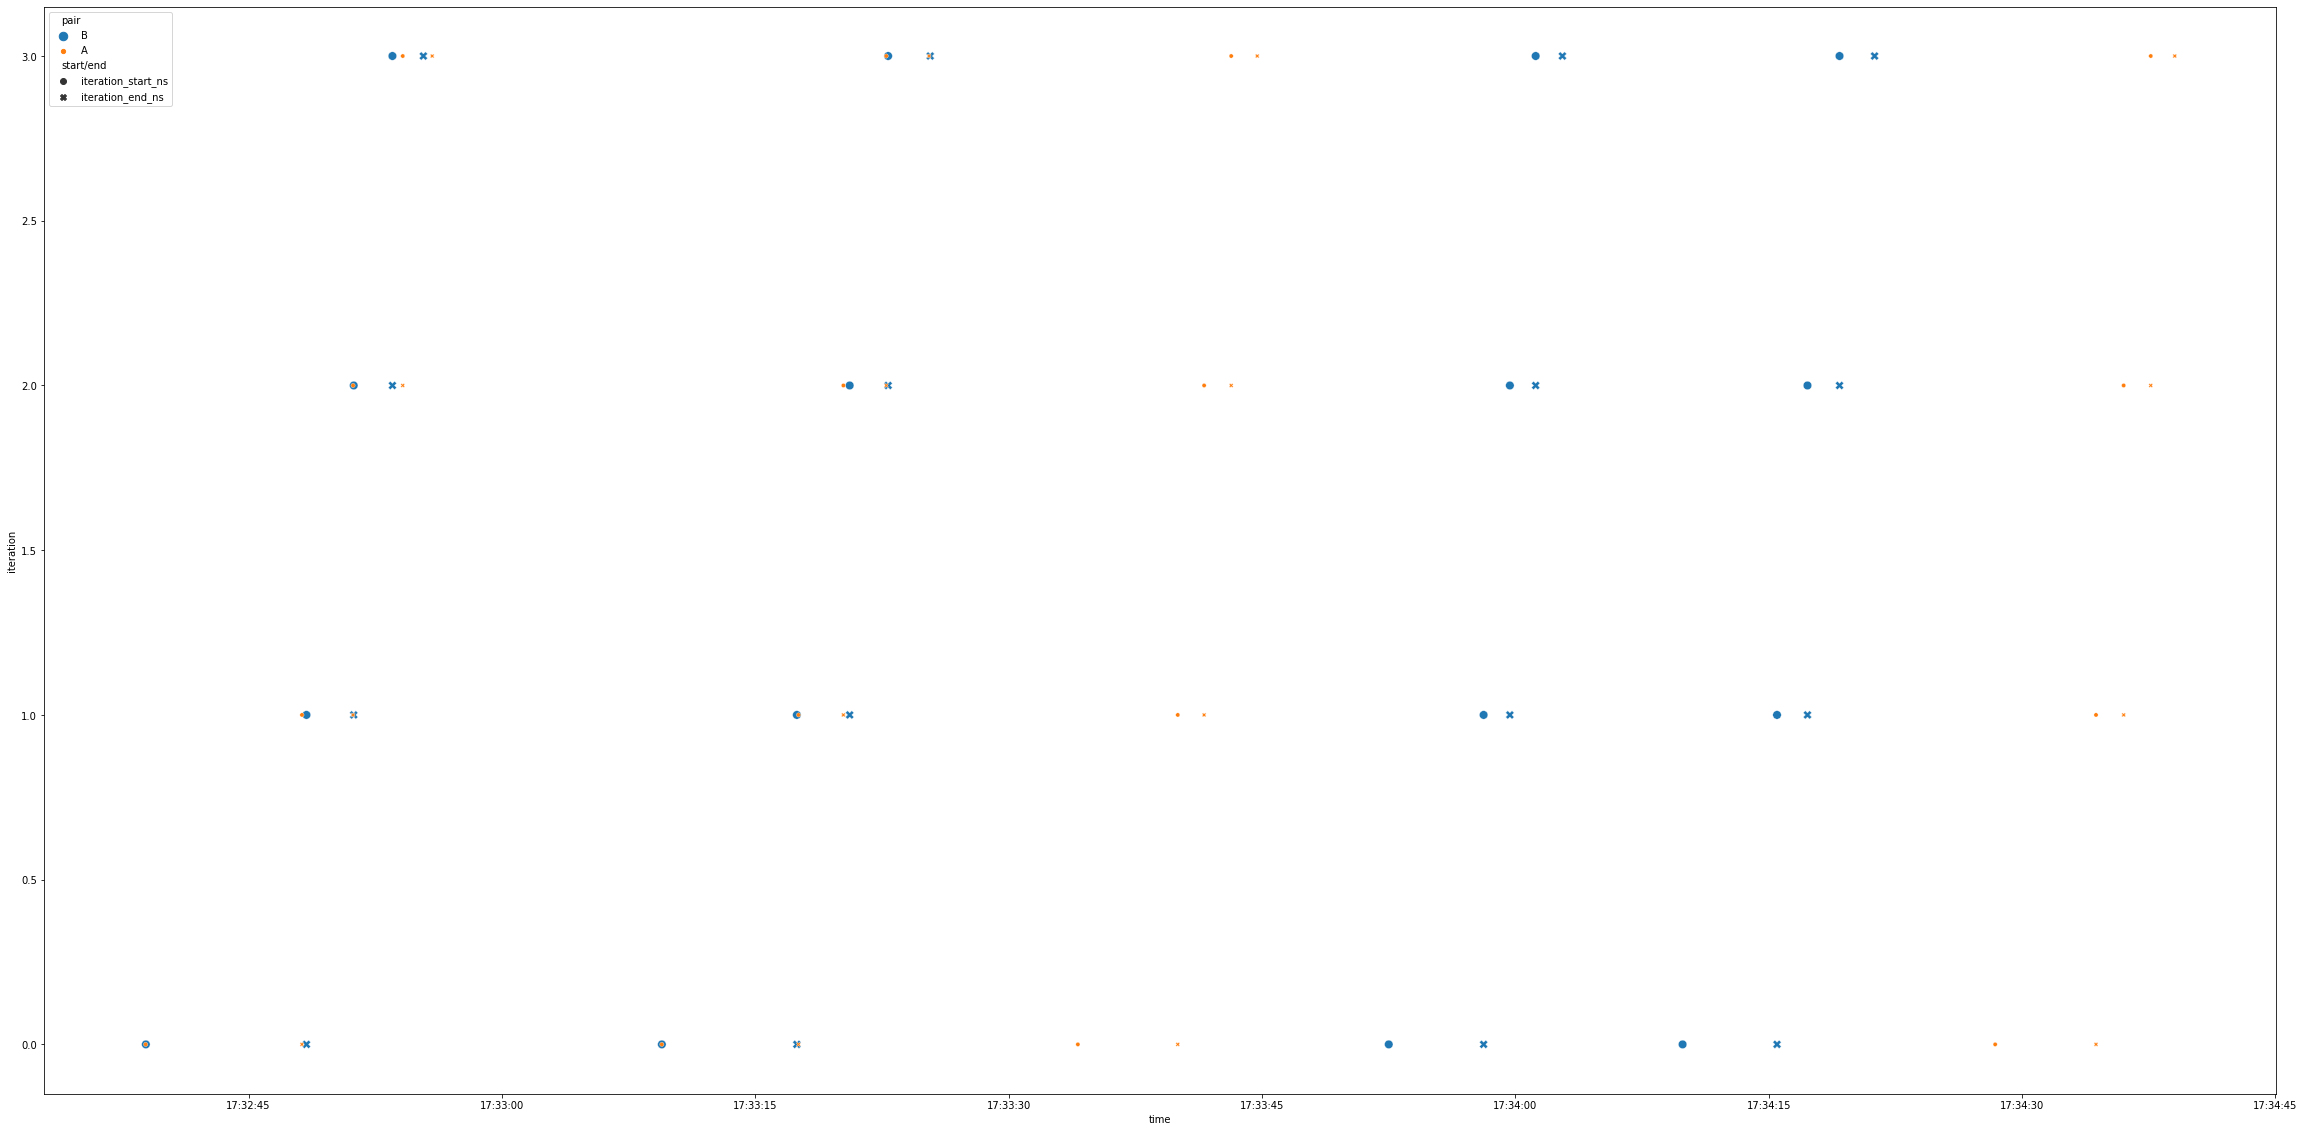

In [20]:
plt.figure(figsize=(40,20))
ax = sns.scatterplot(x="time", y="iteration", hue="pair", style="pair", size="start/end",
    data=df_iterations_melt
    # data=df_iterations_melt[df_iterations_melt.benchmark.isin(["chi-square"])]
)


# Run-time analysis

In [ ]:
df_duration_runid = (df_iterations
    .groupby(by=["type", "benchmark", "runid"])
    .agg({"iteration_start_ns": "min", "iteration_end_ns": "max",})
    .rename({"iteration_start_ns": "runid_start_ns", "iteration_end_ns": "runid_end_ns"}, axis=1)
    .reset_index()
)

df_duration_runid["runid_duration_ns"] = df_duration_runid["runid_end_ns"] - df_duration_runid["runid_start_ns"]
df_duration_runid

,type,benchmark,runid,runid_start_ns,runid_end_ns,runid_duration_ns
0,duet,chi-square,0,1652633373433000000,1652633385028258327,11595258327
1,duet,chi-square,1,1652633397035000000,1652633408008101716,10973101716


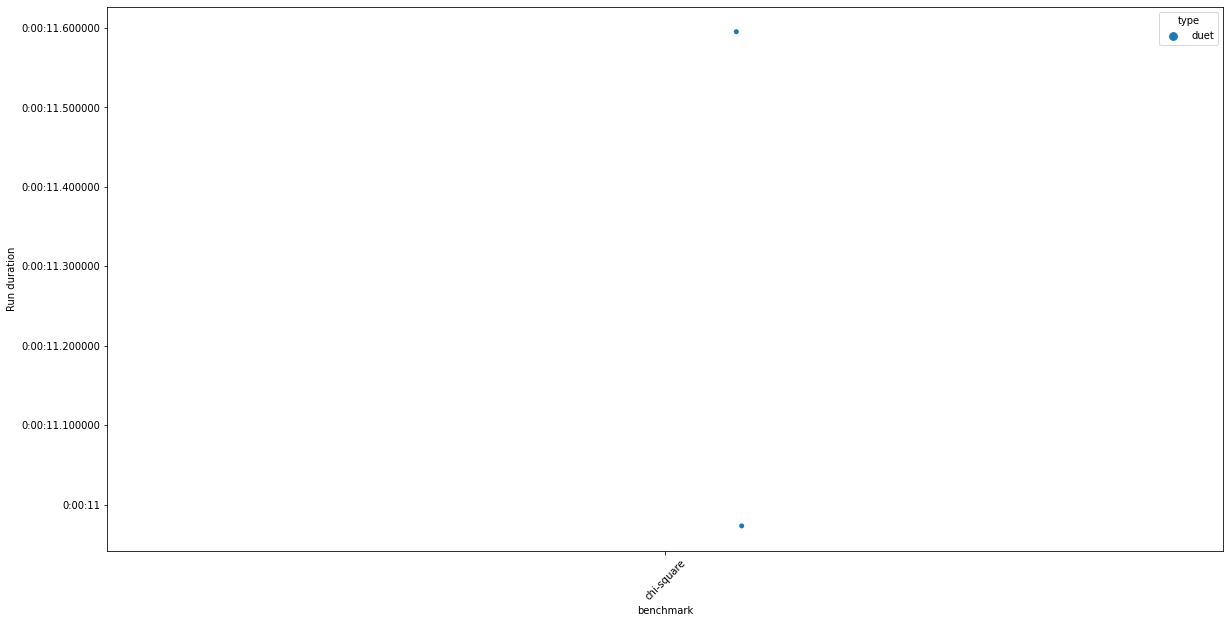

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.stripplot(x="benchmark", y="runid_duration_ns", hue="type", data=df_duration_runid)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns / NS_PER_S))))
ax.set_ylabel("Run duration")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_duration_benchmark = (df_duration_runid
    .groupby(by=["type", "benchmark"])
    .agg({"runid_duration_ns": "mean"})
    .reset_index()
)
df_duration_benchmark

,type,benchmark,runid_duration_ns
0,duet,chi-square,1.128418e+10


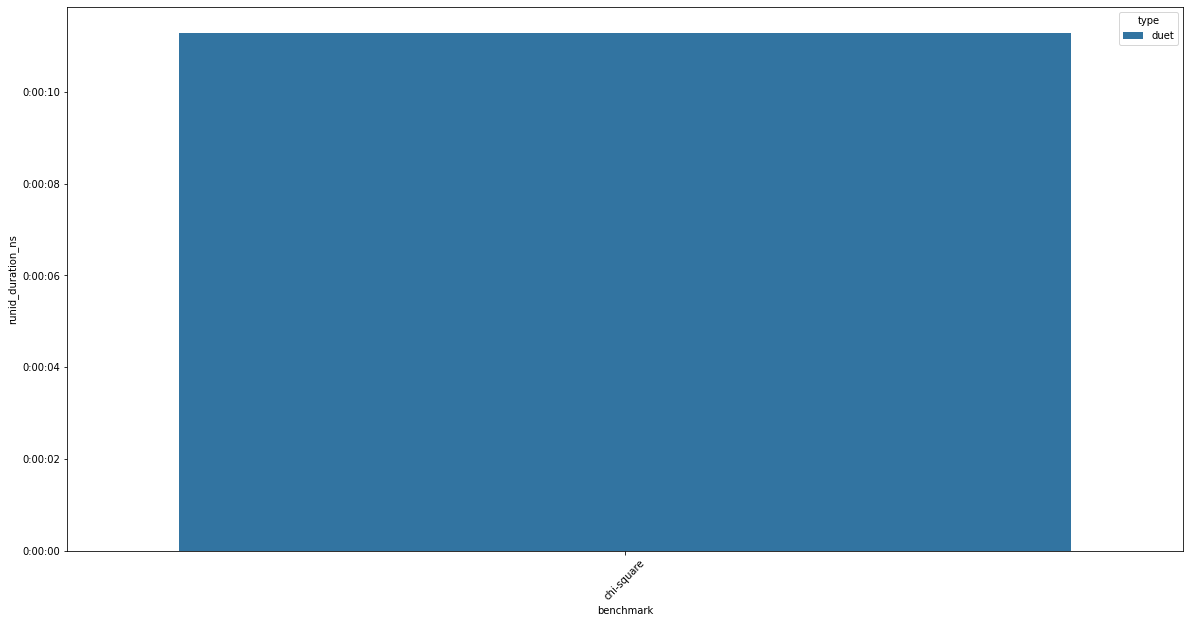

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="benchmark", y="runid_duration_ns", hue="type", data=df_duration_benchmark)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns / NS_PER_S))))
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_duration_benchmark_pivot = df_duration_benchmark.pivot_table(index="benchmark", values="runid_duration_ns", columns=["type"])
df_duration_benchmark_pivot = df_duration_benchmark_pivot.reset_index()
df_duration_benchmark_pivot["relative"] = df_duration_benchmark_pivot["duet"] / df_duration_benchmark_pivot["sequential"]
df_duration_benchmark_pivot

KeyError: 'sequential'

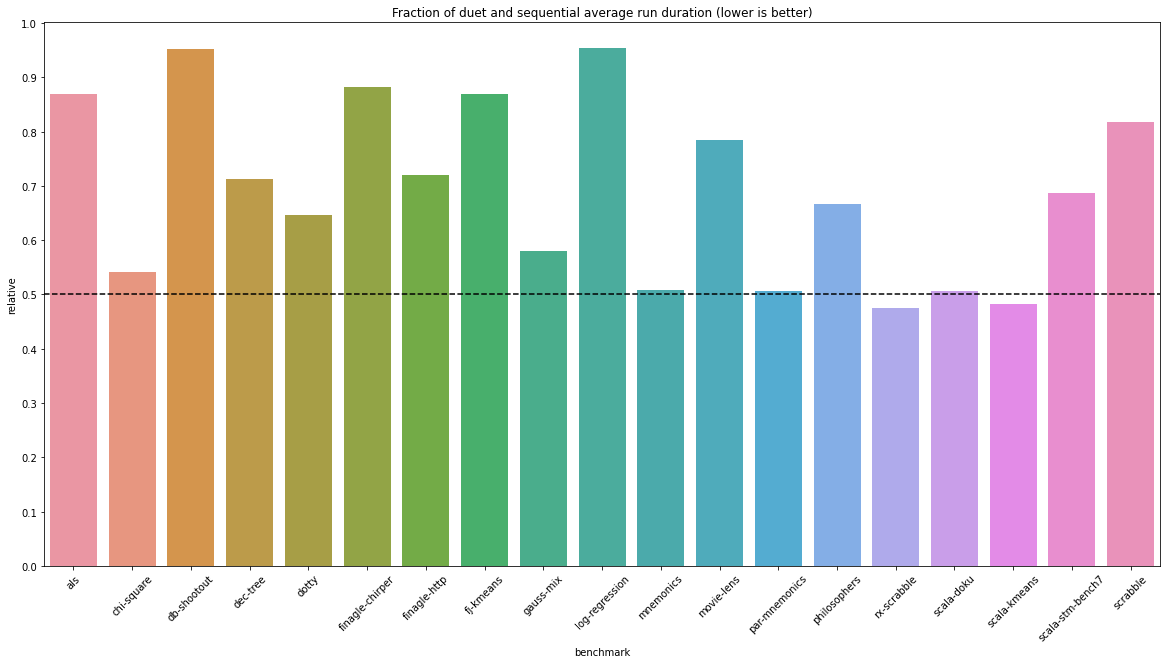

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="benchmark", y="relative", data=df_duration_benchmark_pivot)
ax.set_title("Fraction of duet and sequential average run duration (lower is better)")
ax.axhline(0.5, linestyle='--', color='k')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_duration_type = (df_duration_runid
    .groupby(by=["type"])
    .agg({"runid_duration_ns": ["mean", "sum"]})
)
runtime_improvement =  df_duration_type["runid_duration_ns"]["mean"].loc["sequential"] / df_duration_type["runid_duration_ns"]["mean"].loc["duet"] - 1
runtime_improvement2 =  1 - df_duration_type["runid_duration_ns"]["mean"].loc["duet"] / df_duration_type["runid_duration_ns"]["mean"].loc["sequential"]
df_duration_type

runid_duration_ns               
                        mean            sum
type                                       
duet            1.827074e+11  6942880933400
sequential      2.413266e+11  9170411215200

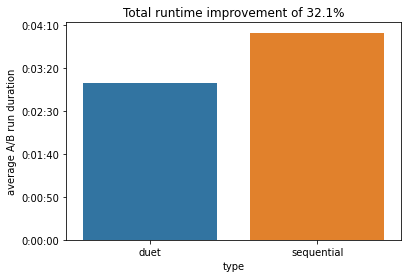

In [ ]:
ax = sns.barplot(x=df_duration_type.index, y=df_duration_type["runid_duration_ns", "mean"])
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns/NS_PER_S))))
ax.set_title(f"Total runtime improvement of {(runtime_improvement * 100):.1f}%")
ax.set_ylabel("average A/B run duration")
plt.show()

## Overlapping timeline

In [ ]:
df_start_end = df_iterations.pivot_table(index=["benchmark", "runid", "iteration"], columns="pair", values=["iteration_start_ns", "iteration_end_ns"])
df_start_end

iteration_end_ns                       \
pair                                         A                    B   
benchmark runid iteration                                             
als       0     0          1651253678640812032  1651253747257307392   
                1          1651253687220146176  1651253755768094208   
                2          1651253697138398720  1651253765557795840   
                3          1651253704992425472  1651253775761128704   
                4          1651253710759815424  1651253782525003520   
...                                        ...                  ...   
scrabble  1     45         1651271981640635648  1651271968962420224   
                46         1651271982211976960  1651271969565743616   
                47         1651271982821774336  1651271970003633408   
                48         1651271983444567040  1651271970433482240   
                49         1651271984025944064  1651271970914548224   

                            iteration_start_ns                       
pair                                         A                    B  
benchmark runid iteration                                            
als       0     0          1651253662128000000  1651253730430000128  
                1          1651253678640812032  1651253747257307392  
                2          1651253687220146176  1651253755768094208  
                3          1651253697138398720  1651253765557795840  
                4          1651253704992425472  1651253775761128704  
...                                        ...                  ...  
scrabble  1     45         1651271981017592832  1651271968331866624  
                46         1651271981640635648  1651271968962420224  
                47         1651271982211976960  1651271969565743616  
                48         1651271982821774336  1651271970003633408  
                49         1651271983444567040  1651271970433482240  

[1460 rows x 4 columns]

In [ ]:
df_duet = df_iterations[df_iterations.type == "duet"]
df_sequential = df_iterations[df_iterations.type == "sequential"]

In [ ]:
# Compute overlap interval
def compute_overlaps(df_iterations: pd.DataFrame):
    df_overlap = df_iterations[df_iterations.pair == "A"].merge(
        df_iterations[df_iterations.pair == "B"], on=["benchmark", "runid"], suffixes=["_A", "_B"], how="inner"
    )
    df_overlap["overlap_start_ns"] = df_overlap[
        ["iteration_start_ns_A", "iteration_start_ns_B"]
    ].max(axis=1)
    df_overlap["overlap_end_ns"] = df_overlap[
        ["iteration_end_ns_A", "iteration_end_ns_B"]
    ].min(axis=1)

    # Filter out positive overlap size
    df_overlap["overlap_size"] = (
        df_overlap["overlap_end_ns"] - df_overlap["overlap_start_ns"]
    )
    df_overlap = df_overlap[df_overlap["overlap_size"] > 0]

    df_overlap.drop(["pair_A", "pair_B"], axis=1, inplace=True)
    df_overlap.reset_index(drop=True, inplace=True)
    return df_overlap

df_overlap = compute_overlaps(df_duet)
df_overlap["overlap_start_delay_ns_A"] = df_overlap["overlap_start_ns"] - df_overlap["iteration_start_ns_A"]
df_overlap["overlap_start_delay_ns_B"] = df_overlap["overlap_start_ns"] - df_overlap["iteration_start_ns_B"]
df_overlap

,benchmark,runid,type_A,order_A,iteration_A,epoch_start_ms_A,iteration_time_ns_A,iteration_start_ns_A,iteration_end_ns_A,iteration_start_A,...,iteration_start_ns_B,iteration_end_ns_B,iteration_start_B,iteration_end_B,iteration_time_B,overlap_start_ns,overlap_end_ns,overlap_size,overlap_start_delay_ns_A,overlap_start_delay_ns_B
0,fj-kmeans,1,duet,BA,0,1651263055306,10986394100,1651263055306000000,1651263066292394100,2022-04-29 20:10:55.306000000,...,1651263055304000000,1651263066458228800,2022-04-29 20:10:55.304000000,2022-04-29 20:11:06.458228800,0 days 00:00:11.154228800,1651263055306000000,1651263066292394100,10986394100,0,2000000
1,fj-kmeans,1,duet,BA,1,1651263055306,10205578900,1651263066292394100,1651263076497973000,2022-04-29 20:11:06.292394100,...,1651263055304000000,1651263066458228800,2022-04-29 20:10:55.304000000,2022-04-29 20:11:06.458228800,0 days 00:00:11.154228800,1651263066292394100,1651263066458228800,165834700,0,10988394100
2,fj-kmeans,1,duet,BA,1,1651263055306,10205578900,1651263066292394100,1651263076497973000,2022-04-29 20:11:06.292394100,...,1651263066458228800,1651263076652594200,2022-04-29 20:11:06.458228800,2022-04-29 20:11:16.652594200,0 days 00:00:10.194365400,1651263066458228800,1651263076497973000,10039744200,165834700,0
3,fj-kmeans,1,duet,BA,2,1651263055306,9987265000,1651263076497973000,1651263086485238000,2022-04-29 20:11:16.497973000,...,1651263066458228800,1651263076652594200,2022-04-29 20:11:06.458228800,2022-04-29 20:11:16.652594200,0 days 00:00:10.194365400,1651263076497973000,1651263076652594200,154621200,0,10039744200
4,fj-kmeans,1,duet,BA,2,1651263055306,9987265000,1651263076497973000,1651263086485238000,2022-04-29 20:11:16.497973000,...,1651263076652594200,1651263086688879600,2022-04-29 20:11:16.652594200,2022-04-29 20:11:26.688879600,0 days 00:00:10.036285400,1651263076652594200,1651263086485238000,9832643800,154621200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,par-mnemonics,1,duet,BA,13,1651269251060,4442405200,1651269312755755900,1651269317198161100,2022-04-29 21:55:12.755755900,...,1651269312311734600,1651269316828883800,2022-04-29 21:55:12.311734600,2022-04-29 21:55:16.828883800,0 days 00:00:04.517149200,1651269312755755900,1651269316828883800,4073127900,0,444021300
2847,par-mnemonics,1,duet,BA,13,1651269251060,4442405200,1651269312755755900,1651269317198161100,2022-04-29 21:55:12.755755900,...,1651269316828883800,1651269321305300500,2022-04-29 21:55:16.828883800,2022-04-29 21:55:21.305300500,0 days 00:00:04.476416700,1651269316828883800,1651269317198161100,369277300,4073127900,0
2848,par-mnemonics,1,duet,BA,14,1651269251060,4430733500,1651269317198161100,1651269321628894600,2022-04-29 21:55:17.198161100,...,1651269316828883800,1651269321305300500,2022-04-29 21:55:16.828883800,2022-04-29 21:55:21.305300500,0 days 00:00:04.476416700,1651269317198161100,1651269321305300500,4107139400,0,369277300
2849,par-mnemonics,1,duet,BA,14,1651269251060,4430733500,1651269317198161100,1651269321628894600,2022-04-29 21:55:17.198161100,...,1651269321305300500,1651269325772035600,2022-04-29 21:55:21.305300500,2022-04-29 21:55:25.772035600,0 days 00:00:04.466735100,1651269321305300500,1651269321628894600,323594100,4107139400,0


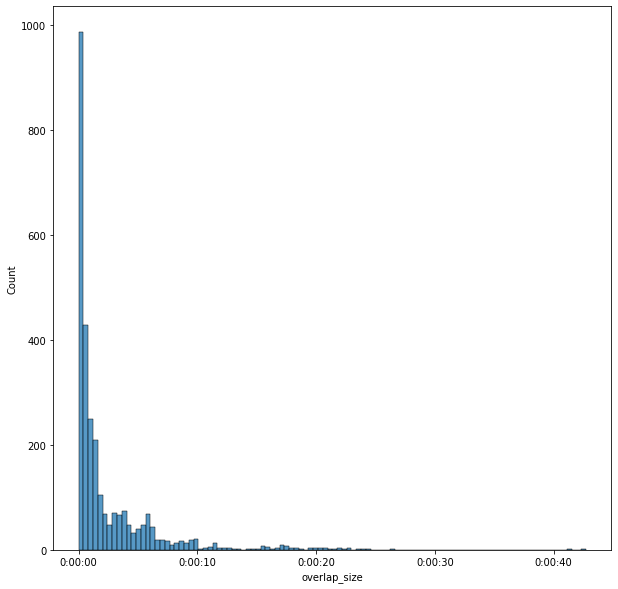

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.histplot(x="overlap_size", data=df_overlap)
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns/NS_PER_S))))
plt.show()

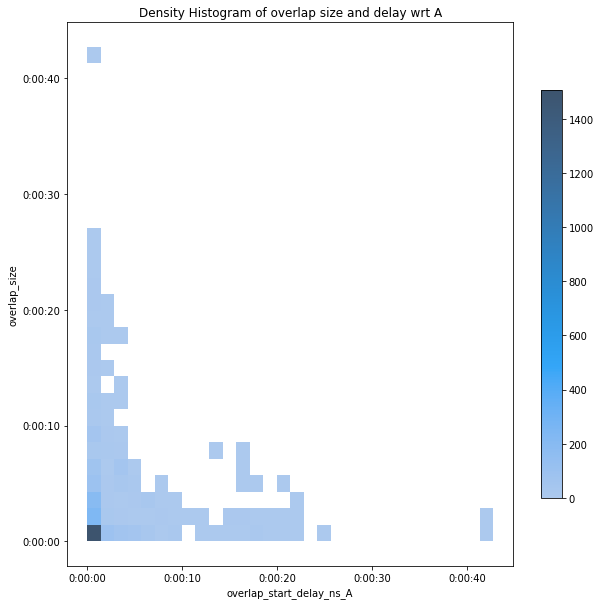

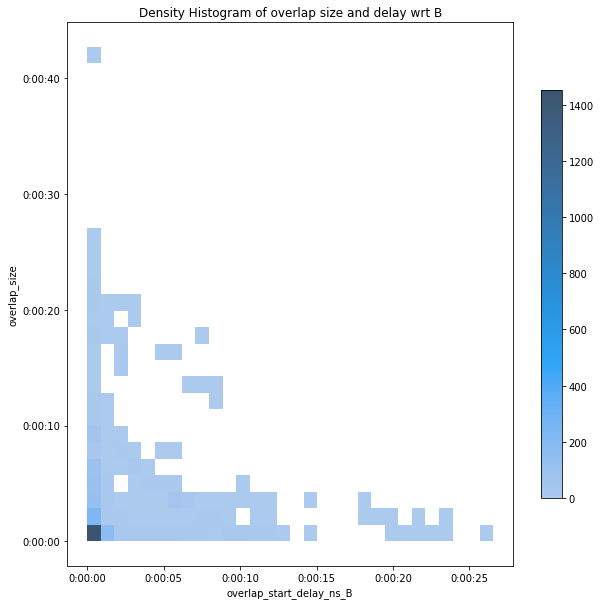

In [ ]:
for pair in ["A", "B"]:
    plt.figure(figsize=(10,10))
    ax = sns.histplot(
        x=f"overlap_start_delay_ns_{pair}", y="overlap_size", data=df_overlap,
        bins=30, cbar=True, cbar_kws=dict(shrink=.75)
    )
    ax.set_title(f"Density Histogram of overlap size and delay wrt {pair}")
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns/NS_PER_S))))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda ns, x: str(datetime.timedelta(seconds=ns/NS_PER_S))))
    plt.show()

In [ ]:
# Other overlap statistics

# Overlap size - proportional
df_overlap["overlap_proportion_A"] = (
    df_overlap["overlap_size"] / df_overlap["iteration_time_ns_A"]
)
df_overlap["overlap_proportion_B"] = (
    df_overlap["overlap_size"] / df_overlap["iteration_time_ns_B"]
)

# Overlap size - proportional
df_overlap["iteration_difference_time_ns"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
)

df_overlap["iteration_difference_time_ns_size_weighted"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) * df_overlap["overlap_size"]

df_overlap["iteration_difference_time_ns_proportion_weighted"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) * df_overlap["overlap_proportion_A"]

df_overlap["iteration_difference_time_ns_scaled"] = (
    df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"]
) / df_overlap["iteration_time_ns_A"]
df_overlap["iteration_difference_time_ns_scaled_size_weighted"] = (
    (df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"])
    / df_overlap["iteration_time_ns_A"]
) * df_overlap["overlap_size"]
df_overlap["iteration_difference_time_ns_scaled_proportion_weighted"] = (
    (df_overlap["iteration_time_ns_A"] - df_overlap["iteration_time_ns_B"])
    / df_overlap["iteration_time_ns_A"]
) * df_overlap["overlap_proportion_A"]

In [ ]:
df_overlap[
    [
        "iteration_time_ns_A",
        "iteration_time_ns_B",
        "overlap_size",
        "iteration_difference_time_ns",
        "iteration_difference_time_ns_size_weighted",
        "iteration_difference_time_ns_proportion_weighted",
        "iteration_difference_time_ns_scaled_size_weighted",
        "iteration_difference_time_ns_scaled_proportion_weighted",
    ]
].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iteration_time_ns_A,2851.0,4.719740e+09,5.393947e+09,1.940203e+08,1.103765e+09,1.882037e+09,7.428190e+09,4.432334e+10
iteration_time_ns_B,2851.0,4.709364e+09,5.327173e+09,1.910699e+08,1.042449e+09,1.870196e+09,7.859448e+09,4.272072e+10
overlap_size,2851.0,2.402761e+09,3.885078e+09,5.110000e+04,2.382224e+08,8.210947e+08,3.105472e+09,4.272072e+10
iteration_difference_time_ns,2851.0,1.037602e+07,1.126705e+09,-1.277786e+10,-6.371850e+07,8.969400e+06,1.136018e+08,2.217307e+10
iteration_difference_time_ns_size_weighted,2851.0,1.156751e+16,1.411065e+18,-8.938734e+18,-4.463296e+16,1.224610e+15,1.074558e+17,9.205297e+18
iteration_difference_time_ns_proportion_weighted,2851.0,-7.152518e+06,3.871170e+08,-9.331164e+09,-2.262979e+07,2.342388e+06,4.440696e+07,3.383181e+09
iteration_difference_time_ns_scaled_size_weighted,2851.0,-7.152518e+06,3.871170e+08,-9.331164e+09,-2.262979e+07,2.342388e+06,4.440696e+07,3.383181e+09
iteration_difference_time_ns_scaled_proportion_weighted,2851.0,-1.887191e-03,1.059645e-01,-3.870526e+00,-1.029514e-02,1.260950e-03,1.695503e-02,2.434763e-01
